# Simple decision rules give high performance for detecting social bots on benchmark datasets

Analysis of benchmark datasets for bot detection.

## Setup

In [2]:
import datetime
# from functools import reduce
# import json
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick
# from matplotlib.ticker import MaxNLocator
import pandas as pd
# import pyreadr
# import random
# from scipy.io import arff
# from sklearn.decomposition import PCA
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.inspection import permutation_importance
# from sklearn import tree, ensemble
# from sklearn.tree import export_text
# from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
# import time
# import xml.etree.ElementTree as ET

In [3]:
from data_accessor import load_twibot, load_bot_repo_dataset, load_cresci2017, load_cresci2015, load_caverlee, load_emd, load_pan19, load_cresci2017_tweets, load_cresci2015_tweets, load_midterm, load_gilani_derived_bands, load_yang, load_yang_tweets
from preprocess import drop_and_one_hot, extract_users, load_json, preprocess_users, COLUMNS_TO_DROP, DUMMY_COLUMNS
from fit_and_score import fit, score, fit_and_score, kfold_cv, analyze_bot_repo_dataset, analyze_bot_repo_dataset_full, train_test_fit_and_score, nonnumeric, mdi_feature_importance, permutation_feature_importance, plot_metrics, calculate_accuracy

In [4]:
PROJ_PATH = "/nfs/sloanlab003/projects/bot_ensemble_proj/bot-detection"

## Load datasets and calculate scores

In [ ]:
yang_tweets, yang_labels = load_yang_tweets(PROJ_PATH + "/data/yang-2013/")
yang_tweets_scores = analyze_bot_repo_dataset(yang_tweets, yang_labels)

Starting kfold_cv at 1654628950.1885793
Finished kfold_cv at 1654629004.339777. Execution time: 54.15119767189026 s
Starting kfold_cv at 1654629004.3399405


In [4]:
# Twibot
twibot_df, twibot_one_hot, twibot_labels = load_twibot(PROJ_PATH + "/data/Twibot-20/train.json")
twibot_test, twibot_one_hot_test, twibot_labels_test = load_twibot(PROJ_PATH + "/data/Twibot-20/test.json")
#twibot_validate, twibot_one_hot_validate, twibot_labels_validate = load_twibot(PROJ_PATH + "/data/Twibot-20/dev.json")
shared_columns = np.intersect1d(twibot_one_hot.columns, twibot_one_hot_test.columns) # Since we want to check on test set, just use common columns between train/test.
twibot_scores = []
for i in range(1, 6):
    dt_clf = fit(twibot_one_hot[shared_columns], twibot_labels, depth=i)
    scr = score(dt_clf, twibot_one_hot_test[shared_columns], twibot_labels_test, silent=True)
    twibot_scores.append(scr)
    
# botometer-feedback
bf, bf_one_hot, bf_labels = load_bot_repo_dataset(PROJ_PATH + "/data/botometer-feedback-2019_tweets.json", PROJ_PATH + "/data/botometer-feedback-2019.tsv")
botometer_feedback_scores = analyze_bot_repo_dataset(bf_one_hot, bf_labels)

#rtbust
rtbust, rtbust_one_hot, rtbust_labels = load_bot_repo_dataset(PROJ_PATH + "/data/cresci-rtbust-2019_tweets.json", PROJ_PATH + "/data/cresci-rtbust-2019.tsv")
rtbust_scores = analyze_bot_repo_dataset(rtbust_one_hot, rtbust_labels)

#gilani-2017
gilani, gilani_one_hot, gilani_labels = load_bot_repo_dataset(PROJ_PATH + "/data/gilani-2017_tweets.json", PROJ_PATH + "/data/gilani-2017.tsv")
gilani_scores = analyze_bot_repo_dataset(gilani_one_hot, gilani_labels)

#gilani-2017 with derived features from orginal paper
gilani_derived_dfs, gilani_derived_labels = load_gilani_derived_bands(PROJ_PATH + f"/data/gilani_derived/classification_processed/")
gilani_derived_scores = [analyze_bot_repo_dataset(gilani_derived_df, gilani_derived_label) for gilani_derived_df, gilani_derived_label in zip(gilani_derived_dfs, gilani_derived_labels)]

#cresci-2017
cresci2017, cresci2017_one_hot, cresci2017_labels = load_cresci2017(PROJ_PATH + "/data/cresci-2017/{}.csv/users.csv")
cresci2017_scores = analyze_bot_repo_dataset(cresci2017_one_hot, cresci2017_labels)

#cresci-2015
cresci2015, cresci2015_one_hot, cresci2015_labels = load_cresci2015(PROJ_PATH + "/data/cresci-2015/{}/users.csv")
cresci2015_scores = analyze_bot_repo_dataset(cresci2015_one_hot, cresci2015_labels)

#caverlee-2011
caverlee2011, caverlee2011_labels = load_caverlee(PROJ_PATH + "/data/social_honeypot_icwsm_2011/")
caverlee2011_scores = analyze_bot_repo_dataset(caverlee2011, caverlee2011_labels)

Starting kfold_cv at 1654569296.6242614
Finished kfold_cv at 1654569296.78486. Execution time: 0.1605985164642334 s
Starting kfold_cv at 1654569296.7851017
Finished kfold_cv at 1654569296.9043663. Execution time: 0.11926460266113281 s
Starting kfold_cv at 1654569296.904673
Finished kfold_cv at 1654569297.0297587. Execution time: 0.12508559226989746 s
Starting kfold_cv at 1654569297.029978
Finished kfold_cv at 1654569297.168235. Execution time: 0.13825702667236328 s
Starting kfold_cv at 1654569297.1685503
Finished kfold_cv at 1654569297.297276. Execution time: 0.12872576713562012 s
Starting kfold_cv at 1654569297.3679843
Finished kfold_cv at 1654569297.5121562. Execution time: 0.14417195320129395 s
Starting kfold_cv at 1654569297.5122433
Finished kfold_cv at 1654569297.617006. Execution time: 0.10476279258728027 s
Starting kfold_cv at 1654569297.61706
Finished kfold_cv at 1654569297.716559. Execution time: 0.09949898719787598 s
Starting kfold_cv at 1654569297.71718
Finished kfold_cv at 

In [7]:
yang, yang_one_hot, yang_labels = load_yang(PROJ_PATH + "/data/yang-2013/")
yang_scores = analyze_bot_repo_dataset(yang_one_hot, yang_labels)

Starting kfold_cv at 1654615852.3800583
Finished kfold_cv at 1654615877.4664397. Execution time: 25.086381435394287 s
Starting kfold_cv at 1654615877.466675
Finished kfold_cv at 1654615907.444159. Execution time: 29.977483987808228 s
Starting kfold_cv at 1654615907.44532
Finished kfold_cv at 1654615941.5274572. Execution time: 34.0821373462677 s
Starting kfold_cv at 1654615941.529127
Finished kfold_cv at 1654615979.9663718. Execution time: 38.43724489212036 s
Starting kfold_cv at 1654615979.9666023
Finished kfold_cv at 1654616021.4285593. Execution time: 41.46195697784424 s


In [4]:
pan19_df, pan19_labels = load_pan19(PROJ_PATH + "/data/pan19/pan19-author-profiling-training-2019-02-18/en/{}.xml", PROJ_PATH + "/data/pan19/pan19-author-profiling-training-2019-02-18/en/truth.txt")
pan19_scores = analyze_bot_repo_dataset(pan19_df, pan19_labels)

In [ ]:
cresci2017_tweets, cresci2017_labels = load_cresci2017_tweets(PROJ_PATH + "/data/cresci-2017/{}.csv/tweets.csv")
cresci2017_tweets_scores = analyze_bot_repo_dataset(cresci2017_tweets, cresci2017_labels)

/home/jhays/bot-detection/data_accessor.py:224: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')
/home/jhays/bot-detection/data_accessor.py:224: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')
/home/jhays/bot-detection/data_accessor.py:224: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')
/home/jhays/bot-detection/data_accessor.py:224: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')
/home/jhays/bot-detection/data_accessor.py:224: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option

In [5]:
cresci2015_tweets, cresci2015_labels = load_cresci2015_tweets(PROJ_PATH + "/data/cresci-2015/{}/tweets.csv")
cresci2015_tweets_scores = analyze_bot_repo_dataset(cresci2015_tweets, cresci2015_labels)

/home/jhays/bot-detection/data_accessor.py:255: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')


Starting kfold_cv at 1654626317.7949297
Finished kfold_cv at 1654626370.664954. Execution time: 52.87002420425415 s
Starting kfold_cv at 1654626370.665665
Finished kfold_cv at 1654626451.4402087. Execution time: 80.77454376220703 s
Starting kfold_cv at 1654626451.4409568
Finished kfold_cv at 1654626543.3047235. Execution time: 91.86376667022705 s
Starting kfold_cv at 1654626543.3054848
Finished kfold_cv at 1654626647.666441. Execution time: 104.3609561920166 s
Starting kfold_cv at 1654626647.6671922
Finished kfold_cv at 1654626762.499904. Execution time: 114.83271169662476 s


In [ ]:
midterm, midterm_one_hot, midterm_labels = load_midterm(PROJ_PATH + "/data/midterm-2018/midterm-2018_processed_user_objects.json", PROJ_PATH + "/data/midterm-2018/midterm-2018.tsv")
midterm_scores = analyze_bot_repo_dataset(midterm_one_hot, midterm_labels)

## varol-2017

Bot repository only has account ids and labels. Reached out to http://sbp-brims.org/2021/papers/working-papers/2021_SBP-BRiMS_FinalPDF_57.pdf to get full data.

In [67]:
varol = np.loadtxt(PROJ_PATH + "/data/gilani_derived/varol-2017.dat", unpack=True)

In [68]:
varol

array([[3.09842135e+09, 5.54067867e+08, 2.56597786e+08, ...,
        3.52864520e+09, 3.39406006e+09, 1.68603364e+09],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Kaiser

Only account ids and labels.

In [33]:
kaiser = pyreadr.read_r(PROJ_PATH + '/data/kaiser/data_botometer.RData')['data_botometer']

In [34]:
kaiser

,user.id_str,date,type,cap.universal,scores.universal
0,1073515275323097088,2019-03-03,bot,0.325413,0.724840
1,961438005675397120,2019-03-03,bot,0.104603,0.515643
2,941291900862124032,2019-03-03,bot,0.060559,0.413570
3,809439447796355072,2019-03-03,bot,0.060559,0.413570
4,769777732213321729,2019-03-03,bot,0.054305,0.393746
...,...,...,...,...,...
374719,2234767742,2019-06-02,ger_bot,0.104603,0.515643
374720,1092190045,2019-06-02,ger_bot,0.010165,0.170132
374721,57146860,2019-06-02,ger_bot,0.023812,0.267344
374722,56828167,2019-06-02,ger_bot,0.005778,0.119570


# Single-class datasets

## Astroturf

Only account ids and labels.

## botwiki-2019

In [36]:
botwiki_profs = extract_users(PROJ_PATH + "/data/botwiki-2019_tweets.json")
botwiki_df, botwiki_one_hot, botwiki_labels = preprocess_users(botwiki_profs, PROJ_PATH + "/data/botwiki-2019.tsv")

## celebrity-2019

In [37]:
celebrity_profs = extract_users(PROJ_PATH + "/data/celebrity-2019_tweets.json")
celebrity_df, celebrity_one_hot, celebrity_labels = preprocess_users(celebrity_profs, PROJ_PATH + "/data/celebrity-2019.tsv")

## political-bots-2019

In [38]:
political_bots_profs = extract_users(PROJ_PATH + "/data/political-bots-2019/political-bots-2019_tweets.json")
political_bots_df, political_bots_one_hot, political_bots_labels = preprocess_users(political_bots_profs, PROJ_PATH + "/data/political-bots-2019/political-bots-2019.tsv")

## pronbots-2019

In [39]:
def extract_users_list(data_path):
    with open(data_path) as f:
        d = json.load(f)
    return d

pronbots_profs = extract_users_list(PROJ_PATH + "/data/pronbots-2019_tweets.json")
pronbots_df, pronbots_one_hot, pronbots_labels = preprocess_users(pronbots_profs, PROJ_PATH + "/data/pronbots-2019.tsv")

KeyError: "None of ['id'] are in the columns"

In [39]:
pronbots_one_hot

,followers_count,friends_count,listed_count,created_at,favourites_count,statuses_count


## vendor-purchased-2019

In [40]:
vendor_purchased_profs = extract_users(PROJ_PATH + "/data/vendor-purchased-2019_tweets.json")
vendor_purchased_df, vendor_purchased_one_hot, vendor_purchased_labels = preprocess_users(vendor_purchased_profs, PROJ_PATH + "/data/vendor-purchased-2019.tsv")

## analysis of each of the specialized classifiers in Botometer

### humans

In [ ]:
human_df = pd.concat([caverlee2011_humans], axis=0)

### simple bots

In [20]:
simple_df = caverlee2011_bots

### spammers

In [28]:
# Load in cresci data
folder_names = [ 'social_spambots_1', 
 'social_spambots_2', 
 'social_spambots_3', 
 'traditional_spambots_1', 
 'traditional_spambots_2', 
 'traditional_spambots_3',
 'traditional_spambots_4']
dfs = []

for name in folder_names:
    df = pd.read_csv(f"./data/cresci-2017/{name}.csv/users.csv")
    dfs.append(df)

    
def format_time(dt):
    try:
        datetime.strptime(dt, "%a %b %d %H:%M:%S %z %Y").timestamp()
    except:
        print(dt)
    
cresci2017_spammers = pd.concat(dfs)



# Preprocess
cresci2017_one_hot = preprocess(cresci2017_spammers, 
                        COLUMNS_TO_DROP + ['profile_banner_url', 
                                                        'test_set_1', 
                                                        'test_set_2', 
                                                        'crawled_at',
                                                        'updated', 
                                                        'timestamp',
                                                        'following', 
                                                        'follow_request_sent',
                                                        'created_at'
                                                  ], 
                        DUMMY_COLUMNS + ['is_translator', 'contributors_enabled', 'notifications'])

spammers_df = pd.concat([pronbots_one_hot, cresci2017_one_hot], ignore_index=True)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [31]:
cresci2017_one_hot

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_en,lang_en-gb,lang_it,lang_ja,lang_nl,...,utc_offset_-14400.0,utc_offset_-7200.0,utc_offset_0.0,utc_offset_3600.0,utc_offset_7200.0,utc_offset_10800.0,utc_offset_14400.0,utc_offset_21600.0,utc_offset_25200.0,utc_offset_32400.0
0,1299,22,40,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,18665,12561,3442,16358,110,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,22987,600,755,14,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7975,398,350,11,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20218,413,405,162,8,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,41,169,151,0,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1124,218,332,245,0,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1125,17,530,300,0,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1126,2,247,202,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### fake followers

### self-declared

### political bots

### other bots

## EMD-2017: "Twitter fake account detection"

All accounts are fake. 

In [23]:
emd, emd_labels = load_emd(PROJ_PATH + '/data/EMD-2017/Twitter_dataset.arff') # Load data

# Text-based classification

## cresci-2017

In [4]:
cresci2017_tweets, cresci2017_labels = load_cresci2017_tweets(PROJ_PATH + "/data/cresci-2017/{}.csv/tweets.csv")

# # Load in data
# folder_names = ['fake_followers', 
#  'genuine_accounts', 
#  'social_spambots_1', 
#  'social_spambots_2', 
#  'social_spambots_3', 
#  'traditional_spambots_1']
# is_bot = [1, 0, 1, 1, 1, 1]
# tweets = []
# cresci2017_labels = []

# for name, ib in zip(folder_names, is_bot):
#     df = pd.read_csv(, encoding='latin-1')
#     df['text'] = df['text'].apply(lambda x: "" if isinstance(x, float) else x)
#     df_groups = df[['text', 'user_id']].groupby(['user_id'])
#     df_tweets = df_groups['text'].apply(lambda x: " ".join(x))
#     tweets.append(df_tweets)
#     print(name, len(df_tweets))
#     cresci2017_labels.extend([ib]*len(df_tweets))
        
# cresci2017_tweets = pd.concat(tweets)

/home/jhays/bot-detection/data_accessor.py:163: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')


fake_followers 3202


/home/jhays/bot-detection/data_accessor.py:163: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')


genuine_accounts 1083


/home/jhays/bot-detection/data_accessor.py:163: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')


social_spambots_1 991


/home/jhays/bot-detection/data_accessor.py:163: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')


social_spambots_2 3457


/home/jhays/bot-detection/data_accessor.py:163: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path_template.format(name), encoding='latin-1')


social_spambots_3 464
traditional_spambots_1 1000


In [27]:
eqs = []
for name, ib in zip(folder_names, is_bot):
    df = pd.read_csv(PROJ_PATH + f"/data/cresci-2017/{name}.csv/tweets.csv", encoding='latin-1')
    eq = df[[(isinstance(row, str)) and ('earthquake' in row) for row in df['text']]]
    eqs.append(eq)
    print(name, len(eq))
    
cresci2017 = pd.concat(eqs)

<ipython-input-27-d4030157cae8>:3: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PROJ_PATH + f"/data/cresci-2017/{name}.csv/tweets.csv", encoding='latin-1')


fake_followers 17


<ipython-input-27-d4030157cae8>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PROJ_PATH + f"/data/cresci-2017/{name}.csv/tweets.csv", encoding='latin-1')


genuine_accounts 5081


<ipython-input-27-d4030157cae8>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PROJ_PATH + f"/data/cresci-2017/{name}.csv/tweets.csv", encoding='latin-1')


social_spambots_1 2


<ipython-input-27-d4030157cae8>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PROJ_PATH + f"/data/cresci-2017/{name}.csv/tweets.csv", encoding='latin-1')


social_spambots_2 9


<ipython-input-27-d4030157cae8>:3: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PROJ_PATH + f"/data/cresci-2017/{name}.csv/tweets.csv", encoding='latin-1')


social_spambots_3 6
traditional_spambots_1 18


In [39]:
import random

random.sample(list(cresci2017['text']), 5)

['Volcanes D. Light mag. 4.2 earthquake  - Crete, Greece on Sunday, 19 April 2015:  http://t.co/bpGRpKH9Qd',
 'I felt no type of earthquake',
 "RT @jonk: Bunch of us huddled in the middle of an intersection away from things we've seen fall. #Kathmandu #earthquake http://t.co/Homswcjâ\x80¦",
 'Road buckle on Hwy 12, Napa, CA. #earthquake http://t.co/ogR5DXNPLL',
 'RT @cctvnews: Pic:â\x80\x9dLoveâ\x80\x9d from above: victims of the 2013 Yaâ\x80\x98an earthquake give thanks to those who helped them rebuild. http://t.co/ZT1W0Glâ\x80¦']

In [40]:
# Get count vectorizer df
cresci2017_cv = CountVectorizer(stop_words='english', min_df=5) 
cresci2017_cv_matrix = cresci2017_cv.fit_transform(cresci2017_tweets) 

In [41]:
cresci2017_cv_df = pd.DataFrame(cresci2017_cv_matrix.toarray(), index=cresci2017_tweets.index, columns=cresci2017_cv.get_feature_names())

In [46]:
fit_and_score(cresci2017_cv_df, cresci2017_labels, depth=2)

|--- earthquake <= 0.50
|   |--- https <= 30.50
|   |   |--- weights: [27.00, 9054.00] class: 1
|   |--- https >  30.50
|   |   |--- weights: [61.00, 16.00] class: 0
|--- earthquake >  0.50
|   |--- https <= 0.50
|   |   |--- weights: [39.00, 34.00] class: 0
|   |--- https >  0.50
|   |   |--- weights: [956.00, 10.00] class: 0

In-sample accuracy: 0.9914680788467196
In-sample precision score: 0.9970267591674926
In-sample recall score: 0.9934167215273206
In-sample F1 score: 0.9952184666117065


(DecisionTreeClassifier(max_depth=2),
 0.9914680788467196,
 0.9970267591674926,
 0.9934167215273206,
 0.9952184666117065)

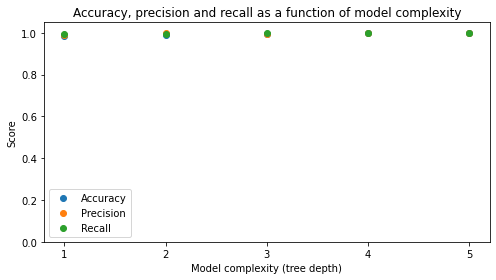

In [43]:
plot_metrics(cresci2017_cv_df, cresci2017_labels)

# Plotting performance of network stats on single plot

In [102]:
scores_dict = {
    "twibot": {
        "a": 0.8664, #accuracy
        "p": 0.8256, #precision
        "r": 0.8657, #recall
        'scores': twibot_scores
    },
    "botometer-feedback-2019": {
        'a': 0.81,
        "p": 0.84,
        "r": 0.7,
        'num_bots': 139,
        'num_humans': 380,
        'scores': botometer_feedback_scores
    },
#     "rtbust": {
#         "a": 0.8755,
#         'p': 0.9304,
#         'r': 0.9512,
#         'scores': rtbust_scores
#     },
    "midterm-2018": {
        "a": 0.987,
        'p': 0.989,
        'r': 0.995,
        'scores': midterm2018_scores
    },
    "gilani": {
        "a": 0.8644,
        'p': 0.854,
        'r': 0.822,
        'scores': gilani_processed_scores
    },
    "cresci-2017": {
        'a': 0.9871,
        'p': 0.98,
        'r': 0.98,
        'scores': cresci2017_scores
    },
    "cresci-2015": {
        "a": 0.991,
        'p': 0.994,
        'r': 0.991,
        'scores': cresci2015_scores
    },
    "caverlee-2011": {
        'a': 0.9826,
        'p': 0.89,
        'r': 0.87,
        'num_bots': 19276,
        'num_humans': 22223,
        'scores': caverlee2011_scores
    },
}
metric_names = ['accuracy', 'precision', 'recall', 'F1']

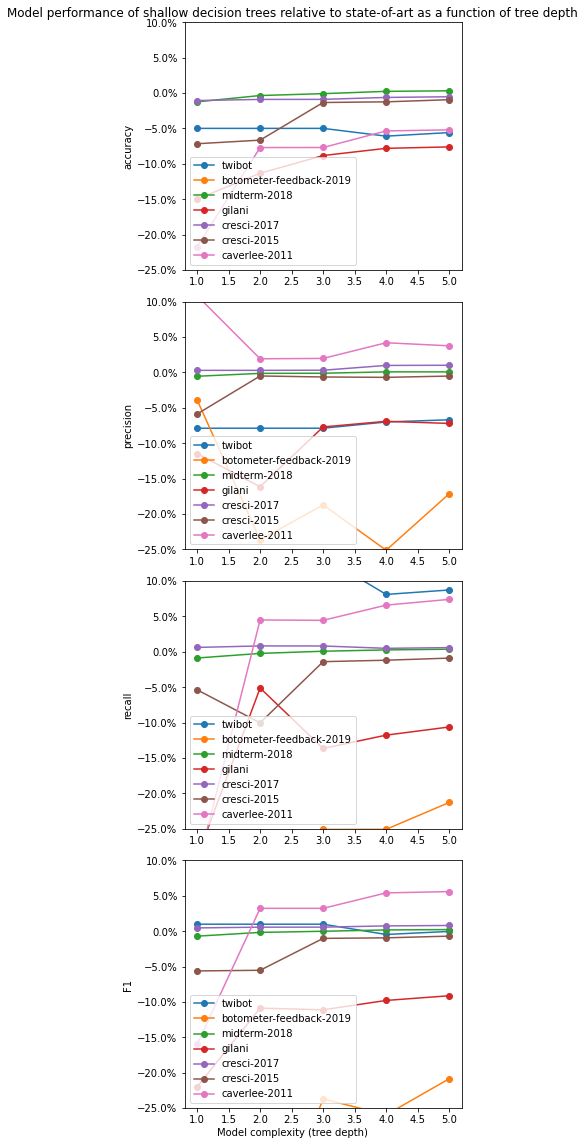

In [103]:
fig, axes = plt.subplots(4,1, figsize=(5, 16))

for i, metric_name in enumerate(metric_names):
    for name, d in scores_dict.items():
#         if (name in ['gilani', 'botometer-feedback-2019', 'rtbust']):
#             continue
        if i == 0:
            if 'a' in d:
                soa_score = d['a']
            else:
                soa_score = calculate_accuracy(d['p'], d['r'], d['num_bots'], d['num_humans'])
        if i == 1:
            soa_score = d['p']
        if i == 2:
            soa_score = d['r']
        if i == 3:
            soa_score = 2 * (d['p'] * d['r']) / (d['p'] + d['r'])

        metric_i = [(item[i] - soa_score)*100 for item in d['scores']]
        axes[i].plot(range(1,6), metric_i, label=name, marker="o")
    axes[i].set_ylabel(metric_name)
    axes[i].set_ylim((-25,10))
    yticks = mtick.PercentFormatter(is_latex=True)
    axes[i].yaxis.set_major_formatter(yticks)
    axes[i].legend(loc='lower left')
fig.text(0.5, 0.0, 'Model complexity (tree depth)', ha='center')
fig.suptitle("Model performance of shallow decision trees relative to state-of-art as a function of tree depth")
fig.tight_layout()
plt.show()

In [43]:
for i, metric_name in enumerate(metric_names):
    for name, d in scores_dict.items():
        if i == 0:
            if 'a' in d:
                soa_score = d['a']
            else:
                continue
        if i == 1:
            soa_score = d['p']
        if i == 2:
            soa_score = d['r']
        if i == 3:
            d['f'] = 2 * (d['p'] * d['r']) / (d['p'] + d['r'])
            soa_score = d['f']
        metric_i = max([item[i] for item in d['scores']])
        delta_i = metric_i - soa_score
        d["sdt_"+metric_name] = metric_i
        d["sdt_delta_"+metric_name] = delta_i

In [44]:
score_df = pd.DataFrame(scores_dict).T

In [45]:
score_df.to_csv("bot_detection_scores.csv")

In [48]:
score_df['sdt_delta_F1']

twibot                     0.009869
botometer-feedback-2019   -0.208807
midterm-2018               0.002122
gilani                    -0.157468
cresci-2017                0.008492
cresci-2015               -0.006928
caverlee-2011              0.056293
Name: sdt_delta_F1, dtype: object